In [27]:
%matplotlib inline

MSE LS training   : 0.4548623670361808
MSE LS overall    : 0.5582064036331594
MSE Ridge training: 0.715217306530343
MSE Ridge overall : 0.6847662550917273


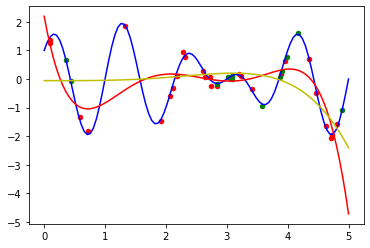

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# Fungsi Asli
def true_fun(X):
    return np.cos(1.5 * np.pi * X) + np.sin(np.pi * 2 * X)

# Buat data sampel di sekitar fungsi asli (ada noise)
np.random.seed(0)

n_samples = 40

X = np.sort(np.random.rand(n_samples))*5
y = true_fun(X) + np.random.randn(n_samples) * 0.11

Xp = np.linspace(0, 5, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Buat model regresi polynomial LS
polynomial_features = PolynomialFeatures(degree=5,include_bias=False) # default degree=5
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], y_train)

#Buat model regresi polynomial Ridge

# MSE LS: 0.55
#rg = Ridge(alpha = 0.2) # MSE Ridge: 0.61
rg = Ridge(alpha = 2000) # MSE Ridge: 0.68, 
#rg = Ridge(alpha = 0.00001)# MSE Ridge: 0.54, 
piper =  Pipeline([("polynomial_features", polynomial_features),
                         ("Ridge", rg)])
piper.fit(X_train[:, np.newaxis], y_train)


plt.plot(Xp, true_fun(Xp), color = 'b', label="True function")
plt.plot(Xp, pipeline.predict(Xp[:, np.newaxis]),color = 'r')
plt.plot(Xp, piper.predict(Xp[:, np.newaxis]),color = 'y')

plt.scatter(X_train, y_train, color='r', s=20)
plt.scatter(X_test, y_test, color='g', s=20)


print("MSE LS training   :", mean_squared_error(y_train, pipeline.predict(X_train[:,np.newaxis])))
print("MSE LS overall    :", mean_squared_error(y, pipeline.predict(X[:,np.newaxis])))
print("MSE Ridge training:", mean_squared_error(y_train, piper.predict(X_train[:,np.newaxis])))
print("MSE Ridge overall :", mean_squared_error(y, piper.predict(X[:,np.newaxis])))


Ridge mendapatkan hasil yang lebih baik pada ovrall MSE dibanding Least Square saat kita mengecilkan tuning parameter alpha.
Pada kasus saya, membuat alpha bernilai 0.02, yang menghasilkan MSE Ridge sebesar 0.549, lebih kecil dari MSE LS yang bernilai 0.558.

Terdapat kasus regresi Ridge tidak lebih baik hasilnya dari Least Square biasa, yaitu saat memilih nilai alpha yang kurang baik.
Contohnya, jika kita memberi alpha nilai yang terlalu besar, misalnya 2000, MSE pada ridge akan bernilai 0.684.
 
Dengan demikian, kita mengetahui bahwa harus memilih dengan baik nilai alpha untuk memperkecil error.